In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import math
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
yf.pdr_override()

In [5]:
obs = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\HK IPO 2022.csv')

In [6]:
obs.columns = obs.iloc[0]
obs = obs.drop(obs.columns[[0]], axis=1)
obs = obs.drop([0])

In [7]:
obs.set_index('Stock Code')

,Company Name at time of listing\n(exclude Chapter 20 cases),Date of Prospectus (dd/mm/yy),Date of Listing (dd/mm/yy),Sponsor(s),Reporting Accountants,Valuer(s),Funds Raised (HK$),IPO Subscription Price (HK$),Funds Raised_international,IPO Subscription Price_international,...,Profit before tax in year-1,Profit for the year in year-3,Profit for the year in year-2,Profit for the year in year-1,"Comments (nearest sales& profit adjustment factor - original data duration in year, eg. 6 month pls input 0.5)",Underwriting Commission and Expenses (%) (the highest senario),Gross spread,Over-allotment Option (%),Subscription Ratio (times),MNEM
Stock Code,,,,,,,,,,,,,,,,,,,,,
2260,Vanov Holdings Company Limited,29/12/21,11/1/2022,CMBC International Capital Limited,Grant Thornton Hong Kong Ltd.,\n\n\n,13932400,1.22,129590840,1.22,...,32914000,35077000,41013000,28572000,0.5,0.04,5740929.6,0.15,13.66,NaN
6680,"JL MAG RARE-EARTH CO., LTD. - H Shares",31/12/21,14/01/22,CLSA Capital Markets Limited/\nBNP Paribas Sec...,Ernst & Young,\n\n\n,848163680,33.8,3392587120,33.8,...,494228000,156597000,244700000,441166000,0.5,0.02,97537268.4,0.15,2.39,NaN
2250,Semk Holdings International Ltd.\n\n,30/12/21,17/01/22,China Everbright Capital Limited \n,PricewaterhouseCoopers,\n\n\n,24600000,2.05,221400000,2.05,...,53216000,24102000,54548000,34922000,0.5,0.06,1353000,0.15,7.31,NaN
2121,"Qingdao AInnovation Technology Group Co., Ltd ...",17/01/22,27/01/22,UBS Securities Hong Kong Limited/ \nChina Inte...,PricewaterhouseCoopers,\n\n\n,117681980,26.3,1059095740,26.3,...,-580597333.3,-248359000,-360635000,-584025333.3,0.75,0.03,35303331.6,0.15,13.89,NaN
1406,Clarity Medical Group Holding Ltd.,31/01/22,18/02/22,China Everbright Capital Limited,PricewaterhouseCoopers,\n\n\n,21760000,1.6,195840000,1.6,...,43816000,30039000,26387000,35769000,NaN,0.04,7616000,0.15,6.17,NaN
9878,"Huitongda Network Co., Ltd. - H Shares",31/01/22,18/02/22,China International Capital Corporation\nHong ...,KPMG\n,\n\n\n,221910100,43,2096297300,43,...,-110477333.3,-304823000,-279992000,-210520000,0.75,0.02,46364148,0.15,1.67,NaN
2157,"Lepu Biopharma Co., Ltd. - B - H Shares",10/2/2022,23/02/22,China International Capital Corporation Hong K...,PricewaterhouseCoopers,AVISTA Valuation Advisory Limited\n,90465440,7.13,820570310,7.13,...,-1002352500,-515492000,-613448000,-1002352500,0.67,0.03,27331072.5,0.15,5.65,NaN
816,"Jinmao Property Services Co., Ltd.",25/02/22,10/3/2022,China International Capital Corporation Hong K...,Ernst & Young,\n\n\n,82555880,8.14,765542580,8.14,...,204313333.3,22624000,77124000,145801333.3,0.75,0.02,16113870.74,0.15,1.2,NaN
7836,Aquila Acquisition Corporation - Z\n,14/03/22,18/03/22,Morgan Stanley Asia Limited/\nCMB Internationa...,BDO Limited,\n\n\n,NaN,NaN,1000650000,10,...,-93654,NaN,NaN,-93654,NaN,0.02,20013000,NaN,NaN,NaN


In [8]:
obs[['Funds Raised (HK$)',
                                                                                    ' IPO Subscription Price (HK$)',
                                                                                    'Funds Raised_international',
                                                                               '  IPO Subscription Price_international ',
                                                                                                              'FX rate',
                                                                                             'Authorized Share Capital',
                                                                                               'Total (without option)',
                                                                                     'Global Offering (without option)',
                                                              'Number of offer shares under the capitalization Issue',
                                                                     'Number of offer shares under Capitalization Rest',
                                                                                                        'Sale Shares',
                                                                                                          'New shares ',
                                                                                                       'Placing Shares',
                                                                                                  'Public Offer shares',
                                                                                                'Maximum Offer Price',
                                                                                                  'Minimum Offer Price',
                                                                          'total assets in year-3 (3 years before IPO)',
                                                                                               'total assets in year-2',
                                                                                               'total assets in year-1',
                                                                                               'total equity in year-3',
                                                                                               'total equity in year-2',
                                                                                               'total equity in year-1',
                                                                                            'total liability in year-3',
                                                                                            'total liability in year-2',
                                                                                            'total liability in year-1',
                                                                                                  'Net sales in year-3',
                                                                                                  'Net sales in year-2',
                                                                                                  'Net sales in year-1',
                                                                                          'Profit before tax in year-3',
                                                                                          'Profit before tax in year-2',
                                                                                          'Profit before tax in year-1',
                                                                                        'Profit for the year in year-3',
                                                                                        'Profit for the year in year-2',
                                                                                        'Profit for the year in year-1',
                                                                                                      'Gross spread ',
                                                                                            'Over-allotment Option (%)',
                                                                                           'Subscription Ratio (times)'
     ]] = obs[['Funds Raised (HK$)',
                                                                                    ' IPO Subscription Price (HK$)',
                                                                                    'Funds Raised_international',
                                                                               '  IPO Subscription Price_international ',
                                                                                                              'FX rate',
                                                                                             'Authorized Share Capital',
                                                                                               'Total (without option)',
                                                                                     'Global Offering (without option)',
                                                              'Number of offer shares under the capitalization Issue',
                                                                     'Number of offer shares under Capitalization Rest',
                                                                                                        'Sale Shares',
                                                                                                          'New shares ',
                                                                                                       'Placing Shares',
                                                                                                  'Public Offer shares',
                                                                                                'Maximum Offer Price',
                                                                                                  'Minimum Offer Price',
                                                                          'total assets in year-3 (3 years before IPO)',
                                                                                               'total assets in year-2',
                                                                                               'total assets in year-1',
                                                                                               'total equity in year-3',
                                                                                               'total equity in year-2',
                                                                                               'total equity in year-1',
                                                                                            'total liability in year-3',
                                                                                            'total liability in year-2',
                                                                                            'total liability in year-1',
                                                                                                  'Net sales in year-3',
                                                                                                  'Net sales in year-2',
                                                                                                  'Net sales in year-1',
                                                                                          'Profit before tax in year-3',
                                                                                          'Profit before tax in year-2',
                                                                                          'Profit before tax in year-1',
                                                                                        'Profit for the year in year-3',
                                                                                        'Profit for the year in year-2',
                                                                                        'Profit for the year in year-1',
                                                                                                      'Gross spread ',
                                                                                            'Over-allotment Option (%)',
                                                                                           'Subscription Ratio (times)'    
]].apply(pd.to_numeric)

In [9]:
obs.dtypes

0
Stock Code                                                                                                         object
Company Name at time of listing\n(exclude Chapter 20 cases)                                                        object
Date of Prospectus (dd/mm/yy)                                                                                      object
Date of Listing (dd/mm/yy)                                                                                         object
Sponsor(s)                                                                                                         object
Reporting Accountants                                                                                              object
Valuer(s)                                                                                                          object
Funds Raised (HK$)                                                                                                float64
 IPO Subscription Pric

In [10]:
obs['Date of Prospectus (dd/mm/yy)'] = pd.to_datetime(obs['Date of Prospectus (dd/mm/yy)'])
obs['Date of Listing (dd/mm/yy)'] = pd.to_datetime(obs['Date of Listing (dd/mm/yy)'])

<AxesSubplot:ylabel='Sector'>

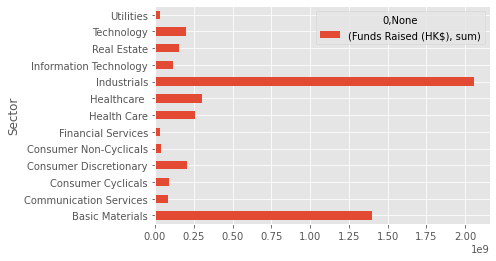

In [11]:
obs.groupby(['Sector']).agg({'Funds Raised (HK$)': ['sum']}).plot.barh(legend = True)

<AxesSubplot:ylabel='Sector'>

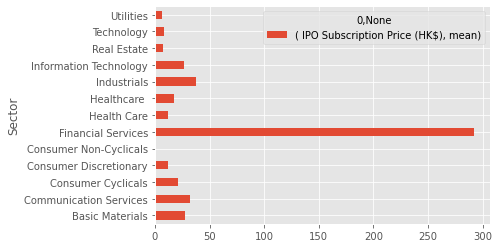

In [12]:
obs.groupby(['Sector']).agg({' IPO Subscription Price (HK$)': ['mean']}).plot.barh(legend=True)


In [13]:
obs.loc[obs['Sector'] == 'Consumer Non-Cyclicals']

,Stock Code,Company Name at time of listing\n(exclude Chapter 20 cases),Date of Prospectus (dd/mm/yy),Date of Listing (dd/mm/yy),Sponsor(s),Reporting Accountants,Valuer(s),Funds Raised (HK$),IPO Subscription Price (HK$),Funds Raised_international,...,Profit before tax in year-1,Profit for the year in year-3,Profit for the year in year-2,Profit for the year in year-1,"Comments (nearest sales& profit adjustment factor - original data duration in year, eg. 6 month pls input 0.5)",Underwriting Commission and Expenses (%) (the highest senario),Gross spread,Over-allotment Option (%),Subscription Ratio (times),MNEM
40,2321,Swang Chai Chuan Ltd.,2022-08-08,2022-08-19,Sunny Fortune Capital Limited,Mazars CPA Limited and Mazars LLP,\n\n\n,40488000.0,0.56,114716000.0,...,32756000.0,17658000.0,18797000.0,23588000.0,NaN,0.1,15520400.0,0.15,19.2,NaN


In [14]:
obs.loc[obs['Sector'] == 'Financial Services']

,Stock Code,Company Name at time of listing\n(exclude Chapter 20 cases),Date of Prospectus (dd/mm/yy),Date of Listing (dd/mm/yy),Sponsor(s),Reporting Accountants,Valuer(s),Funds Raised (HK$),IPO Subscription Price (HK$),Funds Raised_international,...,Profit before tax in year-1,Profit for the year in year-3,Profit for the year in year-2,Profit for the year in year-1,"Comments (nearest sales& profit adjustment factor - original data duration in year, eg. 6 month pls input 0.5)",Underwriting Commission and Expenses (%) (the highest senario),Gross spread,Over-allotment Option (%),Subscription Ratio (times),MNEM
18,7827,Vision Deal HK Acquisition Corp. - Z\n,2022-06-06,2022-10-06,Citigroup Global Markets Asia Limited/ \nHaito...,BDO Limited\n,\n\n,NaN,NaN,1.001000e+09,...,NaN,NaN,NaN,NaN,offer price range is not stated; past financia...,0.02,20020000.0,NaN,NaN,NaN
32,6686,Noah Holdings Private Wealth and Asset Managem...,2022-06-30,2022-07-13,Goldman Sachs (Asia) L.L.C.\n,Deloitte Touche Tohmatsu\n,Savills Valuation and Professional Services Li...,32120000.0,292.0,3.043107e+08,...,1.298042e+09,829151000.0,-745225000.0,1.314131e+09,min offer price is not stated,0.02,6728614.4,0.15,3.26,NaN
39,7841,HK Acquisition Corporation - Z,2022-09-08,2022-08-15,Haitong International Capital Limited\n,KPMG\n,NaN,NaN,NaN,1.000500e+09,...,NaN,NaN,NaN,NaN,offer price range is not stated; past financia...,0.02,15007500.0,NaN,NaN,NaN


In [15]:
obs_date = obs.sort_values(['Date of Listing (dd/mm/yy)'])

In [16]:
obs_date.head()

,Stock Code,Company Name at time of listing\n(exclude Chapter 20 cases),Date of Prospectus (dd/mm/yy),Date of Listing (dd/mm/yy),Sponsor(s),Reporting Accountants,Valuer(s),Funds Raised (HK$),IPO Subscription Price (HK$),Funds Raised_international,...,Profit before tax in year-1,Profit for the year in year-3,Profit for the year in year-2,Profit for the year in year-1,"Comments (nearest sales& profit adjustment factor - original data duration in year, eg. 6 month pls input 0.5)",Underwriting Commission and Expenses (%) (the highest senario),Gross spread,Over-allotment Option (%),Subscription Ratio (times),MNEM
2,6680,"JL MAG RARE-EARTH CO., LTD. - H Shares",2021-12-31,2022-01-14,CLSA Capital Markets Limited/\nBNP Paribas Sec...,Ernst & Young,\n\n\n,848163680.0,33.80,3.392587e+09,...,494228000.0,156597000.0,244700000.0,441166000.0,0.5,0.02,97537268.4,0.15,2.39,NaN
3,2250,Semk Holdings International Ltd.\n\n,2021-12-30,2022-01-17,China Everbright Capital Limited \n,PricewaterhouseCoopers,\n\n\n,24600000.0,2.05,2.214000e+08,...,53216000.0,24102000.0,54548000.0,34922000.0,0.5,0.06,1353000.0,0.15,7.31,NaN
4,2121,"Qingdao AInnovation Technology Group Co., Ltd ...",2022-01-17,2022-01-27,UBS Securities Hong Kong Limited/ \nChina Inte...,PricewaterhouseCoopers,\n\n\n,117681980.0,26.30,1.059096e+09,...,-580597333.3,-248359000.0,-360635000.0,-584025333.3,0.75,0.03,35303331.6,0.15,13.89,NaN
5,1406,Clarity Medical Group Holding Ltd.,2022-01-31,2022-02-18,China Everbright Capital Limited,PricewaterhouseCoopers,\n\n\n,21760000.0,1.60,1.958400e+08,...,43816000.0,30039000.0,26387000.0,35769000.0,NaN,0.04,7616000.0,0.15,6.17,NaN
6,9878,"Huitongda Network Co., Ltd. - H Shares",2022-01-31,2022-02-18,China International Capital Corporation\nHong ...,KPMG\n,\n\n\n,221910100.0,43.00,2.096297e+09,...,-110477333.3,-304823000.0,-279992000.0,-210520000.0,0.75,0.02,46364148.0,0.15,1.67,NaN


In [17]:
monthly_total = obs_date.groupby(obs_date['Date of Listing (dd/mm/yy)'].dt.month)['Total (without option)'].sum()

<AxesSubplot:title={'center':'Totals Per Month'}, xlabel='Date of Listing (dd/mm/yy)'>

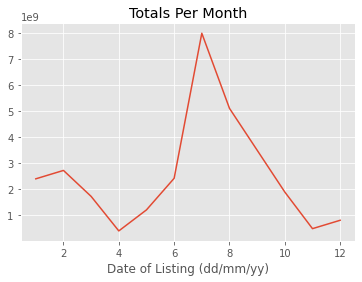

In [18]:
plt.title('Totals Per Month')
#plt.xlabel(['January', 'February','March','April','May','June','July','August','September','October','November','December'], rotation='vertical')
monthly_total.plot()

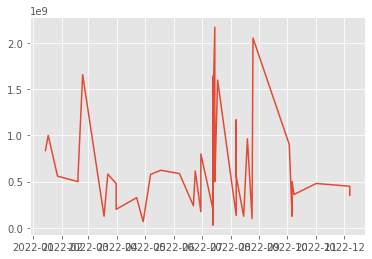

In [19]:
plt.plot(obs_date['Date of Listing (dd/mm/yy)'], obs_date['Total (without option)'])

<AxesSubplot:ylabel='Reporting Accountants'>

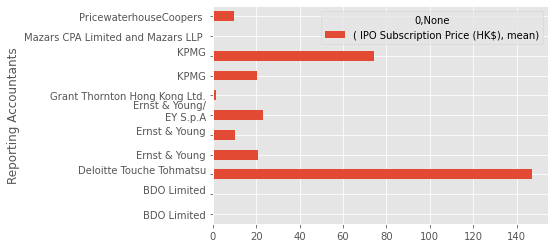

In [20]:
obs.groupby(['Reporting Accountants']).agg({' IPO Subscription Price (HK$)': ['mean']}).plot.barh(legend=True)

In [21]:
obs['Reporting Accountants'].value_counts()

PricewaterhouseCoopers                17
Ernst & Young                          5
KPMG\n                                 5
Ernst & Young\n                        5
KPMG                                   3
Deloitte Touche Tohmatsu\n             2
Grant Thornton Hong Kong Ltd.          1
BDO Limited                            1
Ernst & Young/\nEY S.p.A\n             1
BDO Limited\n                          1
Mazars CPA Limited and Mazars LLP      1
Name: Reporting Accountants, dtype: int64

**Stock Data 3 Months**

In [22]:
stock_codes = obs['Stock Code'].tolist()

In [23]:
stock_codes[7] = '0'+stock_codes[7]


In [24]:
i=0
while i<42:
    stock_codes[i] = stock_codes[i]+'.HK'
    i= i+1
symbols = stock_codes

In [25]:
start = '2022-01-03'
end = '2023-03-08'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  42 of 42 completed

1 Failed download:
- 7841.HK: Period 'max' is invalid, must be one of ['1d', '5d']


,0816.HK,1204.HK,1406.HK,1880.HK,2121.HK,2152.HK,2157.HK,2167.HK,2172.HK,2179.HK,...,6686.HK,7827.HK,7836.HK,7841.HK,9638.HK,9696.HK,9857.HK,9878.HK,9896.HK,9955.HK
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dataset.shape

(283, 42)

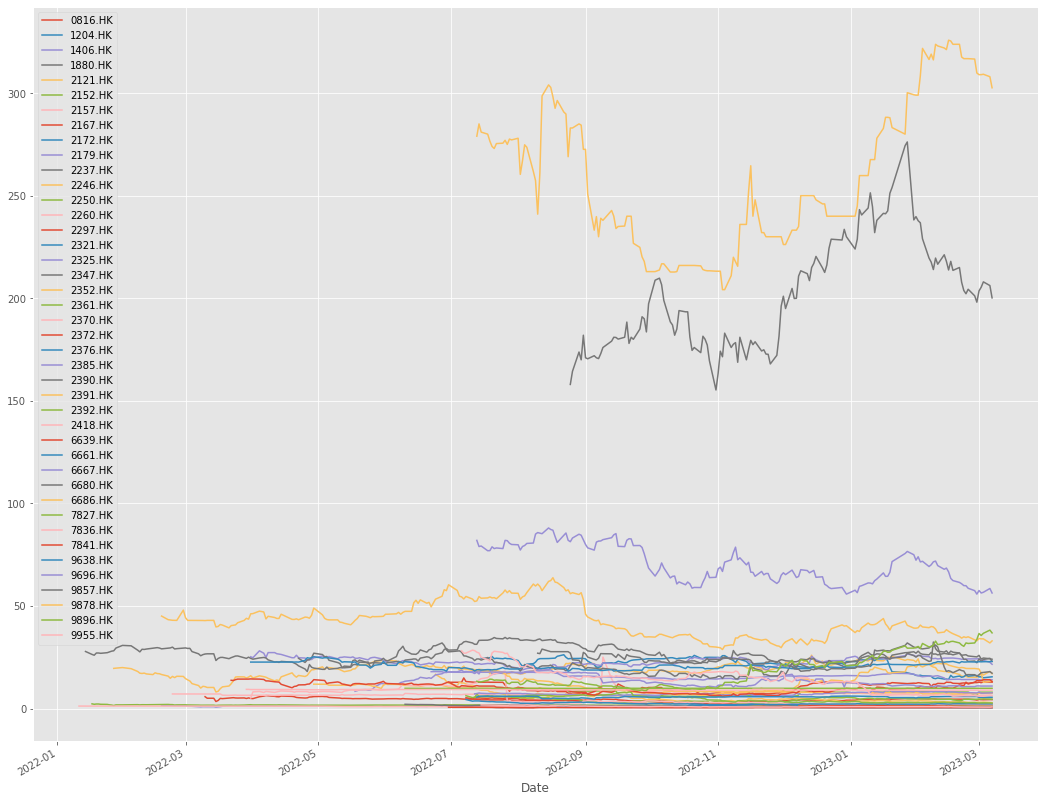

In [27]:
plt.rcParams["figure.figsize"] = (18,15)
ax = dataset.plot()

In [28]:
new = dataset.pct_change()

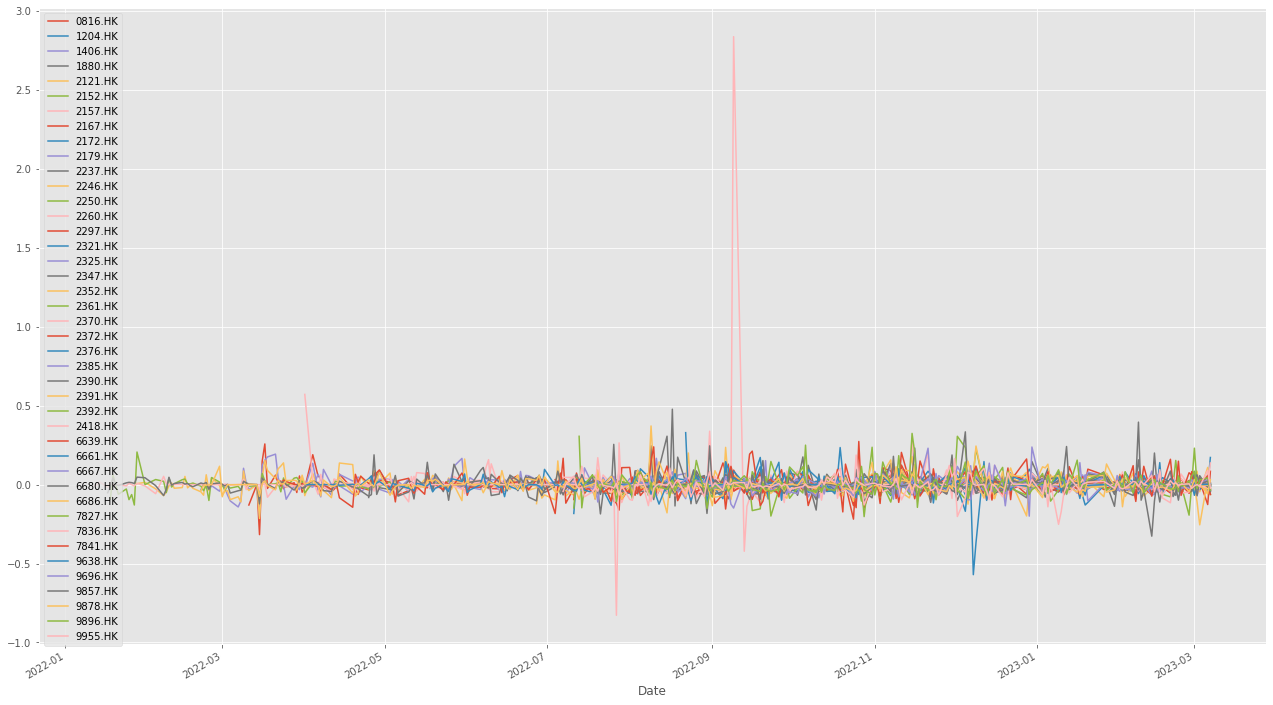

In [29]:
plt.rcParams["figure.figsize"] = (22,13)
percent_change = new.plot()

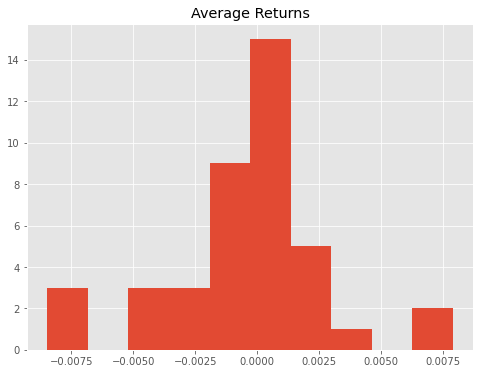

In [74]:
returns = dataset.pct_change()
meanDailyReturns = returns.mean()
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Average Returns');
meanDailyReturns.hist()
plt.show()

In [30]:
dataset1 = dataset.transpose()

In [44]:
obs2021 = pd.read_csv(r'C:\Users\Isabe\Oxygen Exposure of Southern California Megafauna\2021 IPOs.csv')

In [45]:
obs2021

,Stock Code,Name,Market Cap,Unnamed: 3
0,1024.0,KUAISHOU-W,219.93B,NaN
1,NaN,NaN,NaN,NaN
2,9888.0,BIDU-SW,332.38B,NaN
3,NaN,NaN,NaN,NaN
4,9868.0,XPENG-W,63.10B,NaN
...,...,...,...,...
190,8209.0,GT STEEL W2308,-,NaN
191,NaN,NaN,NaN,NaN
192,9608.0,SUNDY SERVICE,240.00M,NaN
193,NaN,NaN,NaN,NaN


In [46]:
obs2021 = obs2021.drop(['Market Cap'],axis=1).drop(obs2021.columns[3],axis = 1)
obs2021 = obs2021.dropna()

In [47]:
obs2021

,Stock Code,Name
0,1024.0,KUAISHOU-W
2,9888.0,BIDU-SW
4,9868.0,XPENG-W
6,9626.0,BILIBILI-W
8,20.0,SENSETIME-W
...,...,...
186,6633.0,QINGCI GAMES
188,6909.0,BETTERLIFE HLDG
190,8209.0,GT STEEL W2308
192,9608.0,SUNDY SERVICE


In [75]:
stock_codes_2021 = obs2021['Stock Code'].tolist()

In [76]:
len(stock_codes_2021)

98

In [77]:
i=0
while i<98:
    stock_codes_2021[i] = str(stock_codes_2021[i])+'.HK'
    stock_codes_2021[i] = stock_codes_2021[i].replace('.0','')
    i= i+1
symbols_2021 = stock_codes_2021

In [78]:
start = '2021-01-03'
end = '2021-03-30'

# Read data 
dataset_2021 = yf.download(symbols_2021,start,end)['Adj Close']

# View Columns
dataset_2021.head()

[*********************100%***********************]  98 of 98 completed

69 Failed downloads:
- 9699.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 2192.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 606.HK: No timezone found, symbol may be delisted
- 2165.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 2235.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 6633.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 2177.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 9868.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 1965.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 6913.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 9858.HK: Data doesn't exist for startDate = 1609603200, endDate = 1617033600
- 20.HK: No timezone found, symbol may be delisted
- 6699.HK: Dat

,1024.HK,1228.HK,13.HK,1413.HK,1440.HK,1473.HK,1490.HK,1643.HK,1855.HK,1927.HK,...,9869.HK,9888.HK,9889.HK,9898.HK,9899.HK,9956.HK,9959.HK,9960.HK,9961.HK,9982.HK
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
